## Compartments detection

__running time__: < 10 min

Here, we present the analysis to detect the compartments in Mouse B and iPS cells. In this example, we will use the GC-content (guanine-cytosine content) to identify which bins belong to the A or B compartments. The percentage of bases that are either guanine or cytosine on a DNA strand correlates directly with gene density and is a good measure to identify open and close chromatine.

*__Note__: Compartments are normally detected on the full genome matrix. In our examples we will just detect them on chr3*

TADbit tools uses the `tadbit segment` tool with the `--only_compartments` to identify compartments.

The identification of compartments is conducted in the normalized matrix at a resolution of around 100kb.  
We will compute the normalization biases for the target resolution 100kb and identify the compartments.

#### Mouse PSC cells

In [1]:
%%bash

tadbit normalize -w ../results/PSC_rep1/ --normalization Vanilla \
    --resolution 100000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2021-10-04 22:17:53]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2021-10-04 22:17:56]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2021-10-04 22:17:57]
      -> too few interactions defined as less than       100 interactions
      -> removed 32 columns (31/32 null/high counts) of 1598 (2.0%)
  - Rescaling sum of interactions per bins                                     [2021-10-04 22:17:57]
  - Vanilla normalization                                                      [2021-10-04 22:17:57]
  - Getting sum of normalized bins                                             

For the identification of the compartments we will use the TADbit `segment tool` with the `only_compartments` flag. The fasta file of the mus musculus reference genome will be used to determine whether the divisions of the principal component correspond to an A or B compartment. TADbit uses the fasta file to compute the GC ratio and associate the regions with higher ratios to A compartments. 

In [2]:
%%bash

tadbit segment -w ../results/PSC_rep1/ --only_compartments \
    --resolution 100000 -C 12 \
    --fasta ../refGenome/mm39_chr3.fa \
    --chromosomes chr3

loading ../results/PSC_rep1/03_filtered_reads/intersection_f69652928b.bam 
    at resolution 100kb

  (Matrix size 1598x1598)                                                      [2021-10-04 22:18:03]

  - Parsing BAM (100 chunks)                                                   [2021-10-04 22:18:03]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2021-10-04 22:18:07]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

Searching compartments
  - Computing GC content to label compartments
Loading cached genome
Processing chromosome chr3
  - Spearman correlation between "rich in A" and Eigenvector:
      rho: -0.7868389 p-val:0.0000000
,-------.
| PATHs |
,----.-------.---------------------------------------------------------

Results are stored in the `06_segmentation/compartments_100kb` subfolder. They include a text file in Tab-separated Values (tsv) format with the description of the compartments and the image of the  correlation matrix used for the identification of the borders for each processed chromosome.

In [3]:
%%bash

ls ../results/PSC_rep1/06_segmentation/compartments_100kb/

chr3_EV1_d911b662f2.png
chr3_EigVect1_d911b662f2.tsv
chr3_d911b662f2.tsv


In [5]:
%%bash

cat ../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d911b662f2.tsv

# EV_1 (108.8097)	EV_2 (27.9290)	EV_3 (16.3873)
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
-0.021511267597536105	0.0011017584752534546	-0.0031005610406844237
-0.024284580746112925	-0.010188089844677744	-0.007053945852833475
-0.02596346874118482	-0.0017173148770163603	0.01408932482315481
-0.0229612142536051	-0.016351339739886724	-0.004952066607639017
-0.01743171554466707	0.0028558933083484873	-0.004532364948497676
-0.022001115827224912	-0.00854170245322374	0.013646324053661198
-0.02206776177871181	0.0013341100029697973	-0.0027502532355311088
-0.015471415467221566	-0.004744328944405019	-0.00423578202719472
-0.022895985710371148	-0.005268326960730908	-0.003503997778606515
-0.02

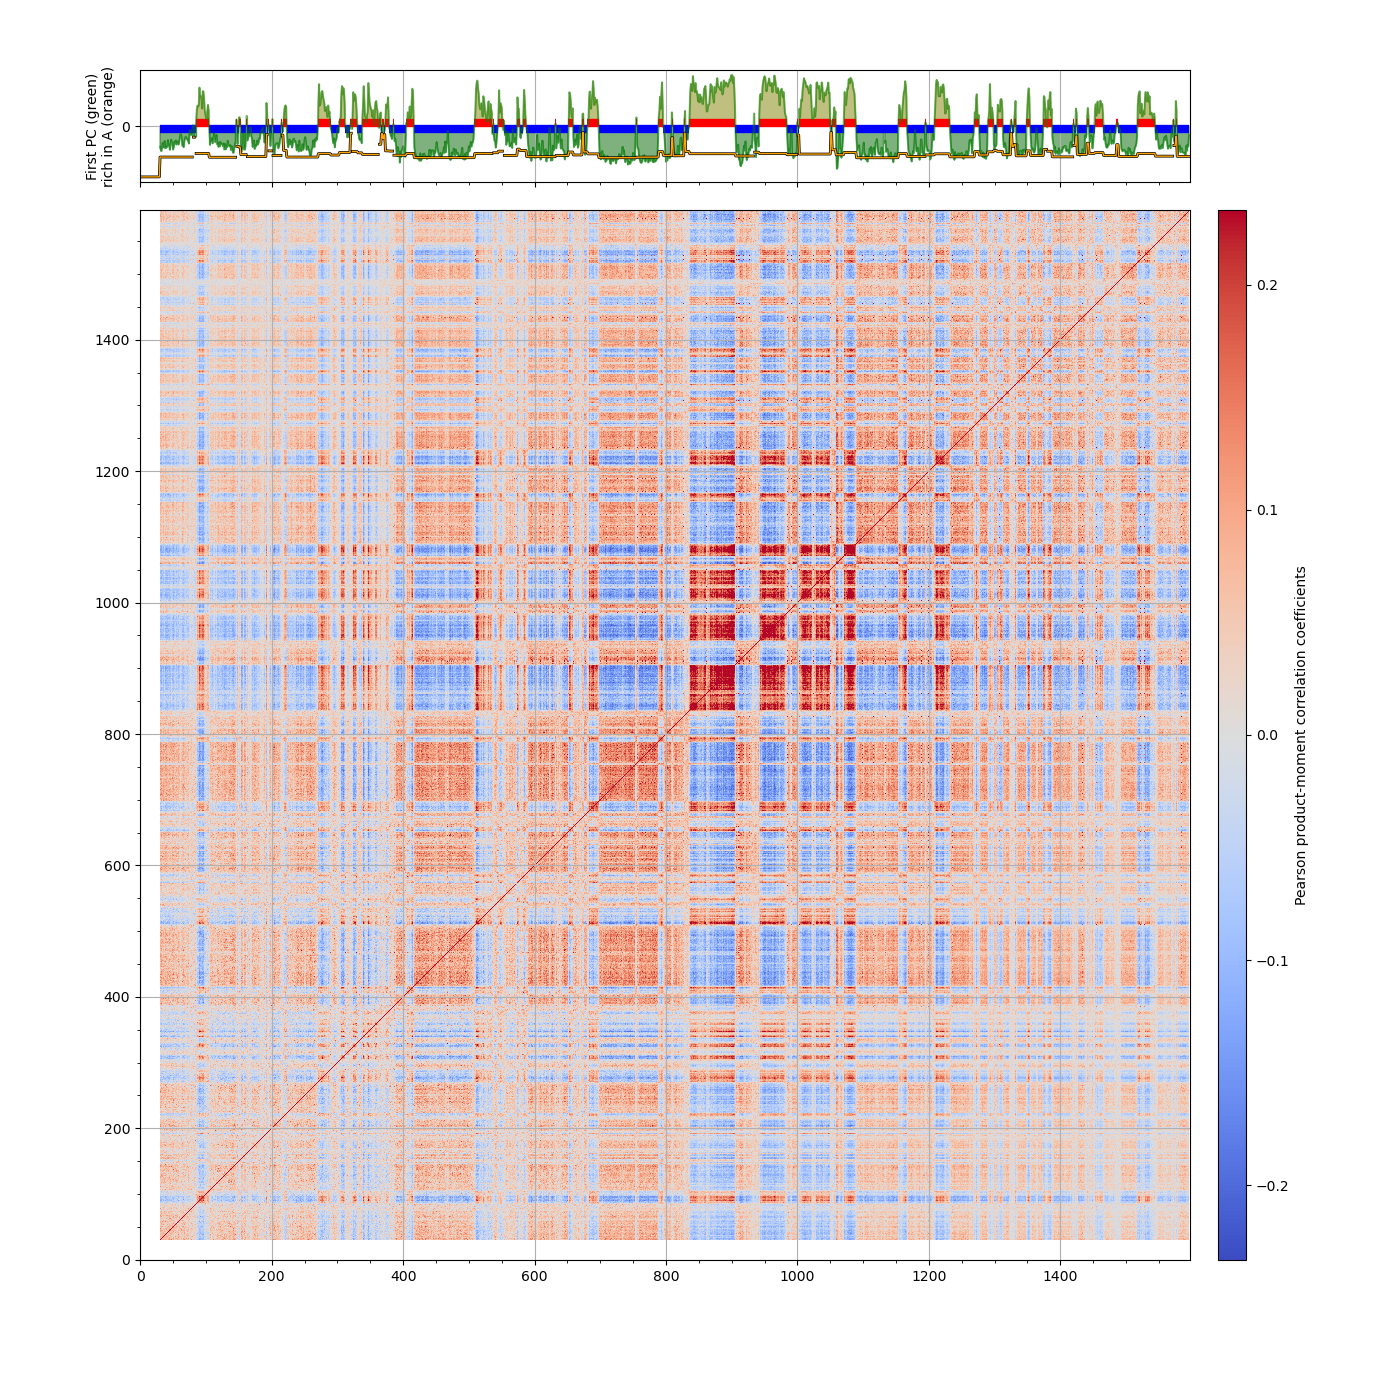

In [6]:
from IPython.display import Image
Image(filename='../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_EV1_d911b662f2.png')

#### Mouse B cells

In [7]:
%%bash

tadbit normalize -w ../results/B_rep1/ --normalization Vanilla \
    --resolution 100000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2021-10-04 22:19:17]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2021-10-04 22:19:20]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2021-10-04 22:19:21]
      -> too few interactions defined as less than       100 interactions
      -> removed 31 columns (31/31 null/high counts) of 1598 (1.9%)
  - Rescaling sum of interactions per bins                                     [2021-10-04 22:19:21]
  - Vanilla normalization                                                      [2021-10-04 22:19:21]
  - Getting sum of normalized bins                                             

In [8]:
%%bash

tadbit segment -w ../results/B_rep1/ --only_compartments \
    --resolution 100000 -C 12 \
    --fasta ../refGenome/mm39_chr3.fa \
    --chromosomes chr3

loading ../results/B_rep1/03_filtered_reads/intersection_f69652928b.bam 
    at resolution 100kb

  (Matrix size 1598x1598)                                                      [2021-10-04 22:19:26]

  - Parsing BAM (100 chunks)                                                   [2021-10-04 22:19:26]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2021-10-04 22:19:30]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

Searching compartments
  - Computing GC content to label compartments
Loading cached genome
Processing chromosome chr3
  - Spearman correlation between "rich in A" and Eigenvector:
      rho: -0.6704794 p-val:0.0000000
,-------.
| PATHs |
,----.-------.-----------------------------------------------------------

In [9]:
%%bash

ls ../results/B_rep1/06_segmentation/compartments_100kb/

chr3_EV1_d911b662f2.png
chr3_EigVect1_d911b662f2.tsv
chr3_d911b662f2.tsv


In [10]:
%%bash

cat ../results/B_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d911b662f2.tsv

# EV_1 (255.4424)	EV_2 (48.3013)	EV_3 (26.1112)
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
-0.024696372921742187	-0.008200818076742323	-0.0027666612563347973
-0.011540945851234318	-0.0032119232649418464	-0.01905556669304481
-0.032658112498594453	0.0007680398169915356	-0.03680293228751876
-0.019457787380431267	0.0032272317393915997	-0.020473541725690287
-0.03183672230272121	0.005726011185724924	-0.03076815011662174
-0.033141984692174734	0.004938731463809828	-0.039388186186085215
-0.03472693974806311	0.004847005126235673	-0.0393440696247213
-0.03357815709246516	0.003820168610077112	-0.03667778223641333
-0.03160895800986442	0.009626780481852759	-0.04264657675764893
-0.021871397

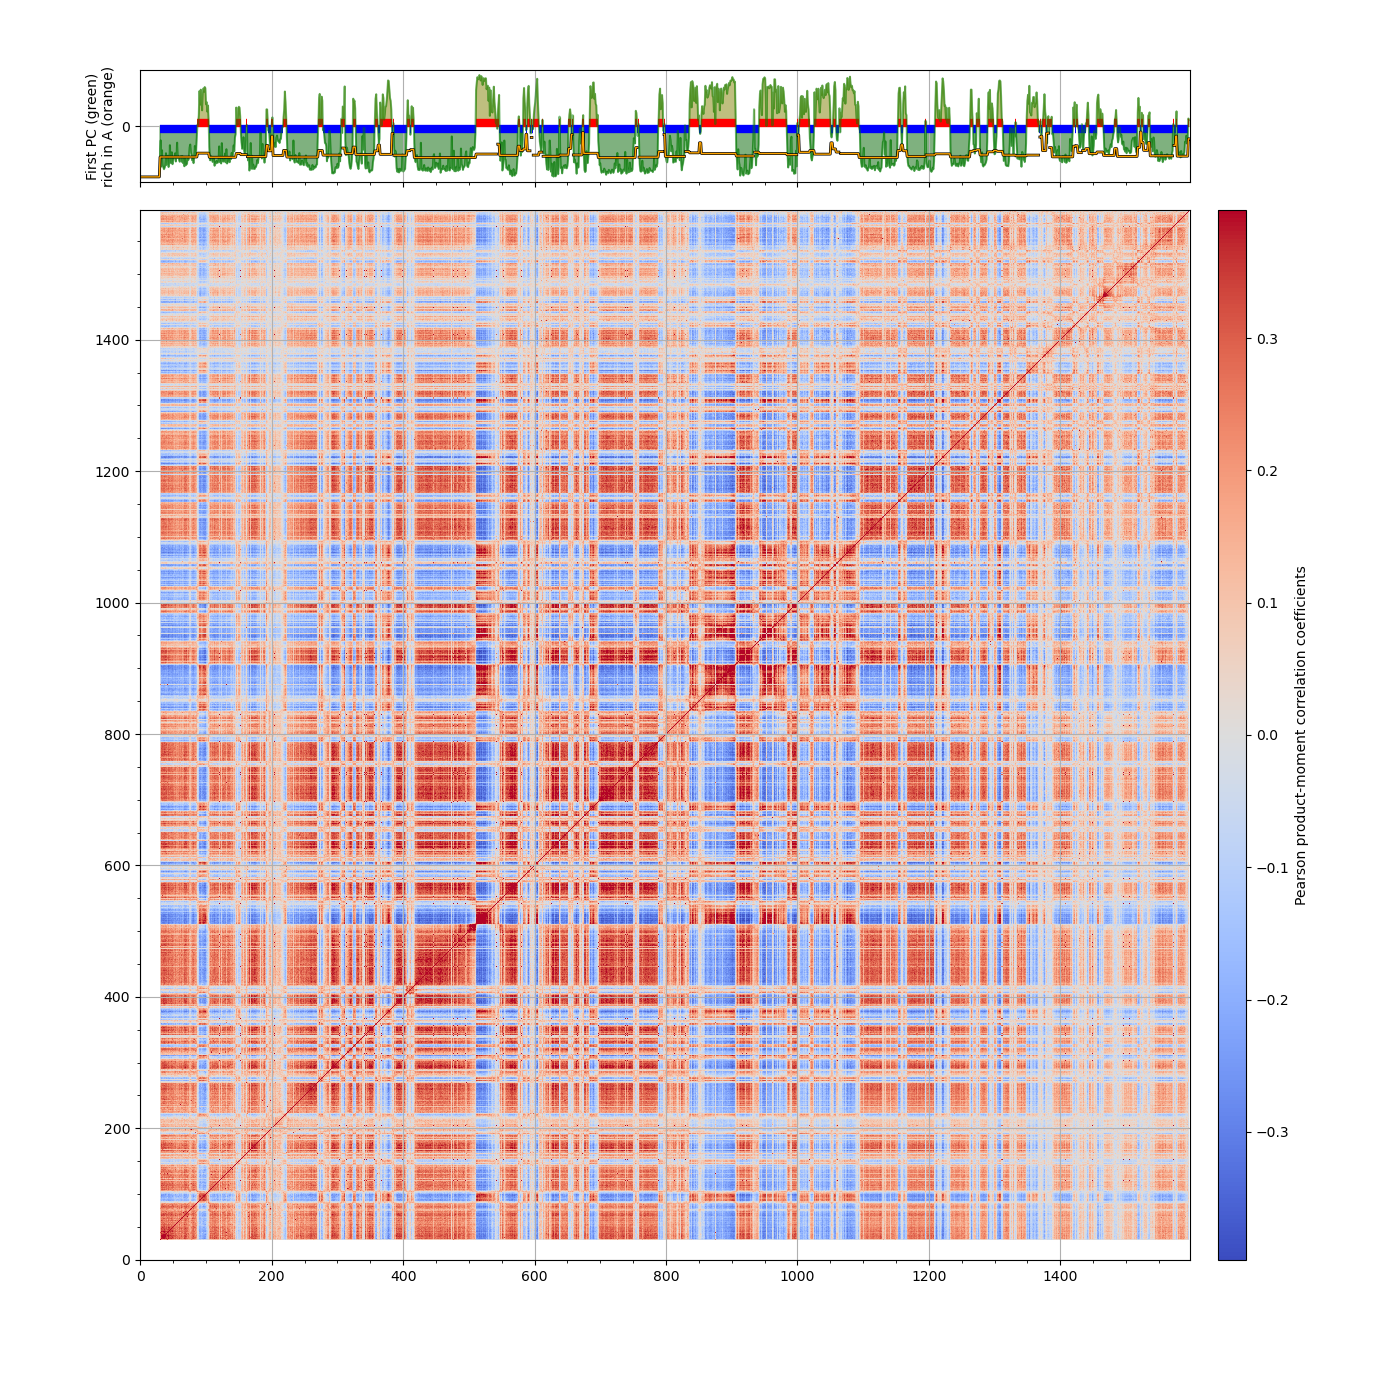

In [11]:
Image(filename='../results/B_rep1/06_segmentation/compartments_100kb/chr3_EV1_d911b662f2.png')

### Compare

As part of the results we also have a file with the coordinates of each computed eigenvector:

In the first column, the coordinates correspond to the assignment of the A and B compartments, positive values for A compartments and negative values for B compartments.

In [13]:
%%bash

head ../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d911b662f2.tsv -n 50

# EV_1 (108.8097)	EV_2 (27.9290)	EV_3 (16.3873)
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
-0.021511267597536105	0.0011017584752534546	-0.0031005610406844237
-0.024284580746112925	-0.010188089844677744	-0.007053945852833475
-0.02596346874118482	-0.0017173148770163603	0.01408932482315481
-0.0229612142536051	-0.016351339739886724	-0.004952066607639017
-0.01743171554466707	0.0028558933083484873	-0.004532364948497676
-0.022001115827224912	-0.00854170245322374	0.013646324053661198
-0.02206776177871181	0.0013341100029697973	-0.0027502532355311088
-0.015471415467221566	-0.004744328944405019	-0.00423578202719472
-0.022895985710371148	-0.005268326960730908	-0.003503997778606515
-0.02

In [16]:
%%bash

head ../results/B_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d911b662f2.tsv -n 50

# EV_1 (255.4424)	EV_2 (48.3013)	EV_3 (26.1112)
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
-0.024696372921742187	-0.008200818076742323	-0.0027666612563347973
-0.011540945851234318	-0.0032119232649418464	-0.01905556669304481
-0.032658112498594453	0.0007680398169915356	-0.03680293228751876
-0.019457787380431267	0.0032272317393915997	-0.020473541725690287
-0.03183672230272121	0.005726011185724924	-0.03076815011662174
-0.033141984692174734	0.004938731463809828	-0.039388186186085215
-0.03472693974806311	0.004847005126235673	-0.0393440696247213
-0.03357815709246516	0.003820168610077112	-0.03667778223641333
-0.03160895800986442	0.009626780481852759	-0.04264657675764893
-0.021871397

We are going to compare the eigevector values for PSC and B cells with some python code:

In [17]:
from builtins   import next

fh = open('../results/B_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d911b662f2.tsv')

header = next(fh)

ev1_B = []
for line in fh:
    evc1, evc2, evc3 = line.split()
    ev1_B.append(float(evc1))
    
fh = open('../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d911b662f2.tsv')

header = next(fh)

ev1_PSC = []
for line in fh:
    evc1, evc2, evc3 = line.split()
    ev1_PSC.append(float(evc1))
    
diff = []
for i in range(len(ev1_B)):
    diff.append(ev1_B[i] - ev1_PSC[i])

### Spot changes in activity

Plot the difference between each eigenvector along the chromosome 3

In [18]:
from matplotlib import pyplot as plt

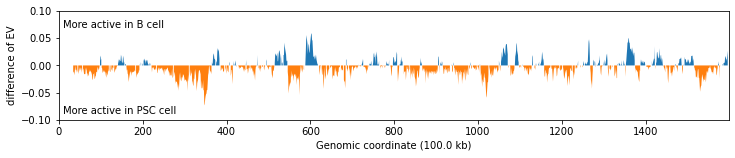

In [19]:
reso = 100000
plt.figure(figsize=(12, 2))
plt.text(10, 0.07, 'More active in B cell')
plt.fill_between(range(len(diff)), diff, 0, where=[i>0 for i in diff])
plt.text(10, -0.09, 'More active in PSC cell')
plt.fill_between(range(len(diff)), diff, 0, where=[i<0 for i in diff])
plt.xlim(0, len(diff))
plt.ylim(-0.1, 0.1)
plt.ylabel('difference of EV')
_ = plt.xlabel('Genomic coordinate (%s kb)' % (reso / 1000))

### Correlate eigenvectors

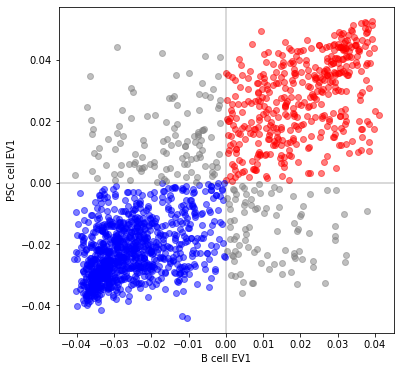

In [20]:
plt.figure(figsize=(6, 6))
for i in range(len(ev1_B)):
    if ev1_B[i] > 0 and ev1_PSC[i] > 0:
        plt.plot(ev1_B[i], ev1_PSC[i], 'ro', alpha=0.5)
    elif ev1_B[i] < 0 and ev1_PSC[i] < 0:
        plt.plot(ev1_B[i], ev1_PSC[i], 'bo', alpha=0.5)
    else:
        plt.plot(ev1_B[i], ev1_PSC[i], 'o', color='grey', alpha=0.5)
plt.axhline(0, color='k', alpha=0.2)
plt.axvline(0, color='k', alpha=0.2)
plt.xlabel('B cell EV1')
_ = plt.ylabel('PSC cell EV1')

### Questions

- According to the plot of the autocorrelation of the eigenvectors, would you conclude that compartments are maintained or change between B and PSC cell?
- Would you feel confortable to describe to a collegue how compartments appear on a Hi-C contact map?